In [0]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
%matplotlib inline

In [0]:
sns.set_style('whitegrid')

# Data Exploration

In [33]:
train = pd.read_csv('https://raw.githubusercontent.com/alexisperrier/packt-aml/master/ch4/titanic_train.csv')
train.head(3)

pclass  survived                        name     sex   age  sibsp  parch  \
0       3         0   Mahon Miss. Bridget Delia  female   NaN      0      0   
1       1         0  Clifford Mr. George Quincy    male   NaN      0      0   
2       3         0          Yasbeck Mr. Antoni    male  27.0      1      0   

   ticket     fare cabin embarked boat  body     home.dest  
0  330924   7.8792   NaN        Q  NaN   NaN           NaN  
1  110465  52.0000   A14        S  NaN   NaN  Stoughton MA  
2    2659  14.4542   NaN        C    C   NaN           NaN

In [0]:
test = pd.read_csv('https://raw.githubusercontent.com/alexisperrier/packt-aml/master/ch4/titanic_heldout.csv')
test.head()

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 13 columns):
pclass      1046 non-null int64
survived    1046 non-null int64
name        1046 non-null object
sex         1046 non-null object
age         844 non-null float64
sibsp       1046 non-null int64
parch       1046 non-null int64
ticket      1046 non-null object
fare        1045 non-null float64
embarked    1044 non-null object
male        1043 non-null float64
Q           1043 non-null float64
S           1043 non-null float64
dtypes: float64(5), int64(4), object(4)
memory usage: 114.4+ KB


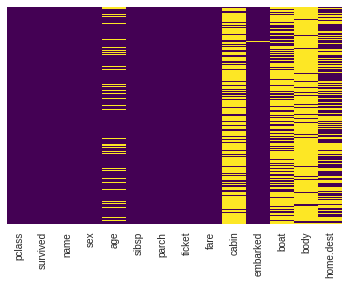

In [0]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


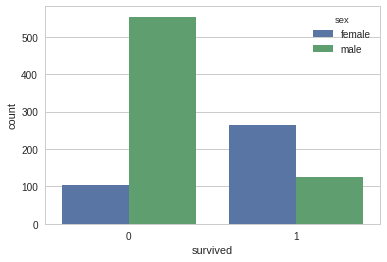

In [0]:
sns.countplot(x='survived', hue='sex', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


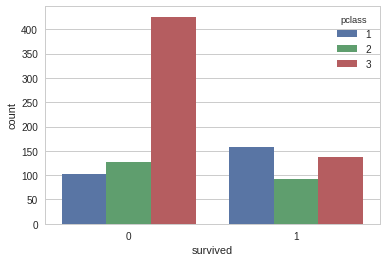

In [6]:
sns.countplot(x='survived', hue='pclass', data=train)

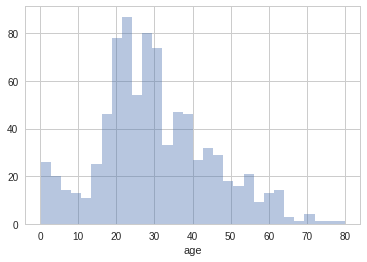

In [9]:
sns.distplot(train['age'].dropna(), kde=False, bins=30)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


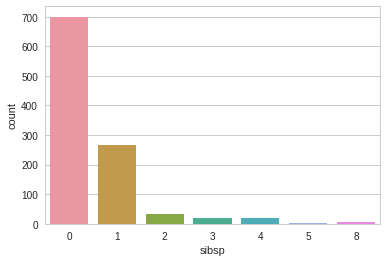

In [10]:
sns.countplot(x='sibsp', data=train)

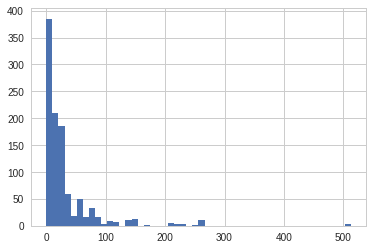

In [12]:
train['fare'].hist(bins=50)

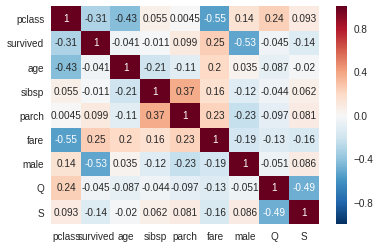

In [105]:
sns.heatmap(train.corr(), annot=True)

# Data Cleaning

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


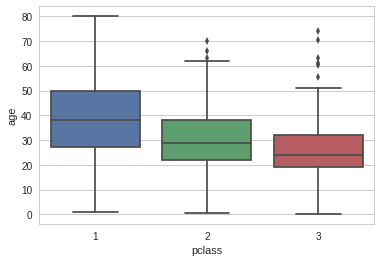

In [15]:
sns.boxplot(x='pclass', y='age',data=train)

To fill in the missing data for the age column we shall do so by imputing the column data

In [0]:
def impute_age(cols):
  age = cols[0]
  pclass = cols[1]
  
  if pd.isnull(age):
    if pclass == 1:
      return 37
    elif pclass == 2:
      return 29
    else:
      return 24
  else: 
      return age

In [0]:
train['age'] = train[['age', 'pclass']].apply(impute_age, axis=1)

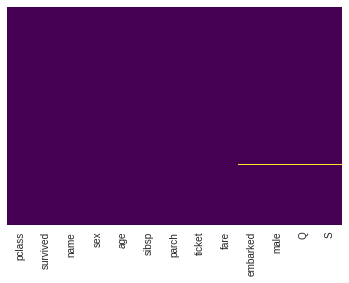

In [41]:
#Rerun the heat map to show which values 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [0]:
train.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

In [0]:
train.dropna(inplace=True)

Convert categorical features into dummy variables 

In [0]:
is_male = pd.get_dummies(train['sex'],drop_first=True)
embarked = pd.get_dummies(train['embarked'],drop_first=True)

In [0]:
train = pd.concat([train,is_male,embarked], axis=1)

In [47]:
train.head()

pclass  survived   age  sibsp  parch     fare  male    Q    S
0       3         0  24.0      0      0   7.8792   0.0  1.0  0.0
1       1         0  37.0      0      0  52.0000   1.0  0.0  1.0
2       3         0  27.0      1      0  14.4542   1.0  0.0  0.0
3       3         1  25.0      0      0   7.7958   1.0  0.0  1.0
4       3         0  34.5      0      0   7.8292   1.0  1.0  0.0

In [0]:
train.drop(['ticket','name','embarked','sex'], axis=1, inplace=True)

# Model building

In [0]:
X = train.drop('survived', axis=1)
y = train['survived']

In [0]:
from sklearn.cross_validation import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [0]:
logmodel = LogisticRegression()

In [62]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
logmodel.score(X_train, y_train)

0.7931506849315069

In [109]:
X_test.head(2)

pclass    age  sibsp  parch    fare  male    Q    S
400       1   0.92      1      2  151.55   1.0  0.0  1.0
330       2  29.00      0      0   15.05   1.0  0.0  0.0

In [0]:
logpredict = logmodel.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test, logpredict))


             precision    recall  f1-score   support

          0       0.79      0.95      0.86       191
          1       0.89      0.60      0.72       122

avg / total       0.83      0.81      0.81       313



This is a result of not setting the pclass as a categorical value

```
                            precision  recall   f1-score  support

          0       0.79      0.95      0.86       191
          1       0.89      0.60      0.72       122

avg / total        0.83     0.81      0.81       313
```



In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, logpredict)

array([[182,   9],
       [ 49,  73]])

# Opting to use the entire test data set
And not spliting the train set. The first step will involve cleaning the dataset

In [92]:
test.head(3)

pclass  survived                          name     sex    age  sibsp  \
0       3         0     Lemberopolous Mr. Peter L    male  34.50      0   
1       3         1                Chip Mr. Chang    male  32.00      0   
2       3         1  Baclini Miss. Helene Barbara  female   0.75      2   

   parch     fare embarked  
0      0   6.4375        C  
1      0  56.4958        S  
2      1  19.2583        C

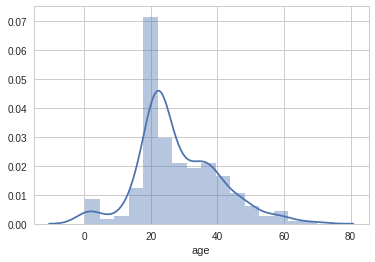

In [89]:
sns.distplot(test['age'])

In [0]:
test.drop(['home.dest','body','boat','ticket','cabin'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


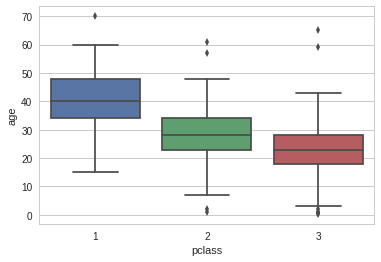

In [77]:
sns.boxplot(x='pclass', y='age', data=test)

In [0]:
#Fill in the missing age values in the test dataset
def impute_testage(cols):
  age = cols[0]
  pclass = cols[1]
  
  if pd.isnull(age):
    if pclass == 1:
      return 40
    elif pclass == 2:
      return 37
    else:
      return 22
  else: 
      return age
  

In [0]:
test['age'] = test[['age', 'pclass']].apply(impute_testage, axis=1)

In [0]:
is_male = pd.get_dummies(test['sex'],drop_first=True)
embarked = pd.get_dummies(test['embarked'],drop_first=True)
#seatclass = pd.get_dummies(test['pclass'], drop_first=True)

In [0]:
test = pd.concat([test, is_male, embarked], axis=1)

In [99]:
test.head(2)

pclass  survived   age  sibsp  parch     fare  male  Q  S
0       3         0  34.5      0      0   6.4375     1  0  0
1       3         1  32.0      0      0  56.4958     1  0  1

In [0]:
test.drop(['name', 'sex','embarked'],axis=1, inplace=True)

# Build model with test data set

In [0]:
test_X = test.drop('survived', axis=1)
test_y = test['survived']

In [0]:
testlog = LogisticRegression()

In [101]:
testlog.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
testpredict = logmodel.predict(test_X)

In [113]:
print(classification_report(test_y, testpredict))

             precision    recall  f1-score   support

          0       0.78      0.88      0.83       152
          1       0.80      0.67      0.73       111

avg / total       0.79      0.79      0.78       263



In [115]:
print(confusion_matrix(test_y, testpredict))

[[133  19]
 [ 37  74]]


In [116]:
logmodel.score(test_X, test_y)

0.7870722433460076